In [8]:
from matplotlib import pyplot as plt
import numpy as np
import tqdm
import cv2
import sc2

%pylab inline

sc2.utils.jit.enable()
sc2.utils.imageio.configurate("default_show_mode", "plt")

Populating the interactive namespace from numpy and matplotlib


# Original Image

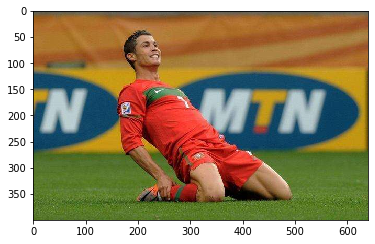

In [9]:
image = sc2.utils.image_load("messi")
sc2.utils.image_show(image)

In [10]:
backup = np.copy(image)

In [11]:
# decide how many seams to expand
steps = int(image.shape[1] * 0.2)

# Image Enlarging
- **每次寻找能量最小的seam，复制一份**

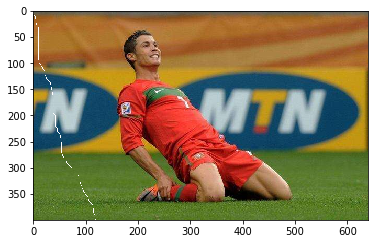

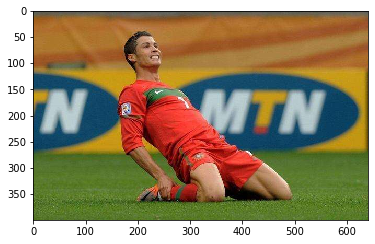

In [12]:
image = np.copy(backup)

# laplacian energy
energy = sc2.energy.laplacian(image)

# find the seam with minimum energy
seam = sc2.seamops.detect_seam(energy)
sc2.utils.image_show(sc2.seamops.image_with_seam(image, seam))

# expand seams in the image
image = sc2.seamops.expand_seam(image, seam)
sc2.utils.image_show(image)

100%|██████████| 127/127 [00:06<00:00, 18.60it/s]


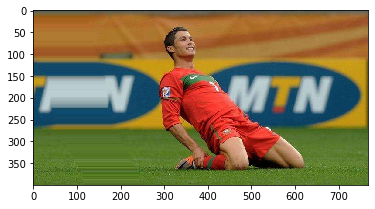

In [13]:
# complete the remaining steps
for i in tqdm.tqdm(range(steps - 1)):
    energy = sc2.energy.laplacian(image)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.expand_seam(image, seam)

sc2.utils.image_show(image)

## 寻找能量最小的若干条seam后复制
-  **避免seam始终在一个区域扩展造成明显的形变**

100%|██████████| 128/128 [00:00<00:00, 982.87it/s]


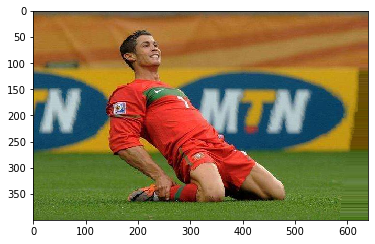

In [14]:
# expand the seams after finding all of them
image = np.copy(backup)
seams = list()
for i in tqdm.tqdm(range(steps)):
    energy = sc2.energy.laplacian(image)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.remove_seam(image, seam)
    seams.append(seam)
    
# relocate the seams
seams = np.array(seams)
seams = sc2.seamops.relocate_seams(seams)

# expand the seams
for seam in tqdm.tqdm(seams):
    image = sc2.seamops.expand_seam(image, seam)
    
sc2.utils.image_show(image)

### Comparation：the second method avoids the enlargement of a single line